In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
import nltk
from tqdm import tqdm
import torchtext.data as data
import torch.optim as optim
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from torchtext.data import get_tokenizer
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import re

In [2]:
pip install torchtext


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
true_df = pd.read_csv('True.csv')
false_df = pd.read_csv('Fake.csv')

In [5]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
false_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [9]:
false_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [18]:
len(false_df)

23481

In [14]:
len(true_df)

21417

In [15]:
np.ones(len(true_df))

array([1., 1., 1., ..., 1., 1., 1.])

In [11]:
true_df['category'] = np.ones(len(true_df), dtype=int)
false_df['category'] = np.zeros(len(false_df), dtype=int)

In [12]:
true_df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
false_df.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


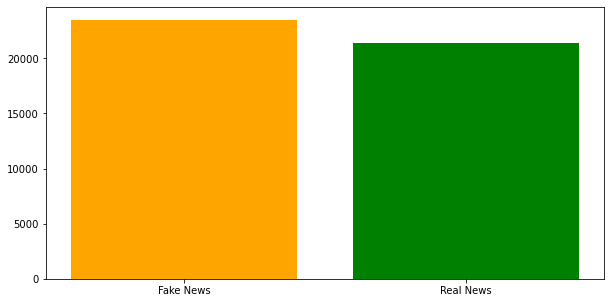

In [17]:
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(false_df), color='orange')
plt.bar('Real News', len(true_df), color='green')
plt.show()

In [19]:
# Difference of the Fake and Real News
print(f'Difference between Fake and Real News: {len(false_df) - len(true_df)}')

Difference between Fake and Real News: 2064


In [21]:
# concat = merging datasets
news_df = pd.concat([true_df, false_df], axis=0)

In [22]:
news_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 1.9+ MB


In [23]:
news_df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [28]:
news_df = news_df.sample(frac=1)

In [29]:
news_df.head(5)

,title,text,subject,date,category
15952,"Brexit agreement more likely than 'no deal', s...",LONDON (Reuters) - Britain is more likely to s...,worldnews,"November 1, 2017",1
14988,SAY WHAT? Organization With Ties To Muslim Bro...,Just another attempt by CAIR to make it appear...,politics,"Nov 2, 2015",0
21118,"Xi, Putin agree to 'appropriately deal' with N...",BEIJING (Reuters) - Chinese President Xi Jinpi...,worldnews,"September 3, 2017",1
1091,Sean Hannity Goes Apesh*t Over Trump As Caesa...,It s crystal clear that nobody can accuse Sean...,News,"June 19, 2017",0
19987,British PM May outraged at North Korea's 'reck...,LONDON (Reuters) - Prime Minister Theresa May ...,worldnews,"September 15, 2017",1


In [30]:
news_df['subject'].value_counts()


politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [31]:
news_df = pd.get_dummies(news_df, columns=['subject'])
news_df.head()

,title,text,date,category,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
15952,"Brexit agreement more likely than 'no deal', s...",LONDON (Reuters) - Britain is more likely to s...,"November 1, 2017",1,0,0,0,0,0,0,0,1
14988,SAY WHAT? Organization With Ties To Muslim Bro...,Just another attempt by CAIR to make it appear...,"Nov 2, 2015",0,0,0,0,0,0,1,0,0
21118,"Xi, Putin agree to 'appropriately deal' with N...",BEIJING (Reuters) - Chinese President Xi Jinpi...,"September 3, 2017",1,0,0,0,0,0,0,0,1
1091,Sean Hannity Goes Apesh*t Over Trump As Caesa...,It s crystal clear that nobody can accuse Sean...,"June 19, 2017",0,0,0,1,0,0,0,0,0
19987,British PM May outraged at North Korea's 'reck...,LONDON (Reuters) - Prime Minister Theresa May ...,"September 15, 2017",1,0,0,0,0,0,0,0,1


In [32]:
news_df = news_df.drop('date', axis=1)
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 15952 to 11388
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   category                 44898 non-null  int32 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int32(1), object(2), uint8(8)
memory usage: 1.5+ MB


In [34]:
import nltk
# Download wordnet
nltk.download('wordnet')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
from nltk.corpus import wordnet

new_text = []
pattern = "[^a-zA-Z]"

lemma = nltk.WordNetLemmatizer()

for txt in tqdm(news_df.text):
    
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_text.append(txt)
    
new_text[0]

100%|███████████████████████████████████████████████████████████████████████████| 44898/44898 [01:55<00:00, 389.12it/s]


'london reuters britain is more likely to strike an exit deal with the european union than it is to crash out of the bloc without any agreement british trade minister liam fox said on wednesday'

In [36]:
new_title = []
for txt in tqdm(news_df.title):
    
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_title.append(txt)
new_title[0]

100%|██████████████████████████████████████████████████████████████████████████| 44898/44898 [00:07<00:00, 6121.84it/s]


'brexit agreement more likely than no deal say uk s trade minister'

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(new_title).toarray() 
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

print("Finished")

Finished


In [38]:
news_df.head(5)


,title,text,category,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
15952,"Brexit agreement more likely than 'no deal', s...",LONDON (Reuters) - Britain is more likely to s...,1,0,0,0,0,0,0,0,1
14988,SAY WHAT? Organization With Ties To Muslim Bro...,Just another attempt by CAIR to make it appear...,0,0,0,0,0,0,1,0,0
21118,"Xi, Putin agree to 'appropriately deal' with N...",BEIJING (Reuters) - Chinese President Xi Jinpi...,1,0,0,0,0,0,0,0,1
1091,Sean Hannity Goes Apesh*t Over Trump As Caesa...,It s crystal clear that nobody can accuse Sean...,0,0,0,1,0,0,0,0,0
19987,British PM May outraged at North Korea's 'reck...,LONDON (Reuters) - Prime Minister Theresa May ...,1,0,0,0,0,0,0,0,1


In [39]:
news_df.drop(['title', 'text'], axis=1, inplace=True)
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 15952 to 11388
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   category                 44898 non-null  int32
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int32(1), uint8(8)
memory usage: 876.9 KB


In [40]:
print(news_df.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [41]:
X = np.concatenate((np.array(news_df.drop('category', axis=1)), title_matrix,
                     text_matrix), axis=1)

y = news_df.category

In [42]:
print(X.shape)
print(y.shape)

(44898, 5008)
(44898,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), 
                                                    test_size=0.25, 
                                                    random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33673, 5008)
(11225, 5008)
(33673,)
(11225,)


# BUILDING MODEL

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NewsClassifier(nn.Module):
    def __init__(self):
        super(NewsClassifier, self).__init__()
        
        # Fully connected layers
        self.linear1 = nn.Linear(5008, 2000)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(2000, 500)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(500, 100)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.linear4 = nn.Linear(100, 20)
        self.relu4 = nn.ReLU()
        self.linear5 = nn.Linear(20, 2)

    def forward(self, x):
        # Fully connected layers
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.dropout(out)
        out = self.linear4(out)
        out = self.relu4(out)
        out = self.linear5(out)

        return out


In [46]:
model = NewsClassifier()
optimizer = torch.optim.Adam(model.parameters(), lr=0.012)
criterion = nn.CrossEntropyLoss()


In [47]:
import torch
from tqdm import tqdm

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).type(torch.LongTensor)

EPOCHS = 30

for epoch in tqdm(range(EPOCHS)):
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    
    # Calculate loss
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train).sum().item()
    accuracy = correct / len(y_train) * 100.0

    print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%')

  3%|██▊                                                                                | 1/30 [00:36<17:52, 36.99s/it]

Epoch [1/30], Loss: 0.7026, Accuracy: 47.74%


  7%|█████▎                                                                          | 2/30 [03:59<1:02:36, 134.16s/it]

Epoch [2/30], Loss: 14.9876, Accuracy: 52.26%


 10%|████████▎                                                                          | 3/30 [04:35<40:18, 89.57s/it]

Epoch [3/30], Loss: 1.5196, Accuracy: 39.33%


 13%|███████████                                                                        | 4/30 [05:12<29:44, 68.62s/it]

Epoch [4/30], Loss: 2.6923, Accuracy: 47.73%


 17%|█████████████▊                                                                     | 5/30 [05:49<23:53, 57.33s/it]

Epoch [5/30], Loss: 1.5065, Accuracy: 49.32%


 20%|████████████████▌                                                                  | 6/30 [06:26<20:13, 50.55s/it]

Epoch [6/30], Loss: 0.7466, Accuracy: 52.17%


 23%|███████████████████▎                                                               | 7/30 [07:03<17:38, 46.03s/it]

Epoch [7/30], Loss: 1.0088, Accuracy: 47.75%


 27%|██████████████████████▏                                                            | 8/30 [07:38<15:35, 42.53s/it]

Epoch [8/30], Loss: 0.8057, Accuracy: 47.75%


 30%|████████████████████████▉                                                          | 9/30 [08:13<14:01, 40.05s/it]

Epoch [9/30], Loss: 0.6733, Accuracy: 48.07%


 33%|███████████████████████████▎                                                      | 10/30 [08:47<12:47, 38.37s/it]

Epoch [10/30], Loss: 0.6722, Accuracy: 56.75%


 37%|██████████████████████████████                                                    | 11/30 [09:23<11:53, 37.58s/it]

Epoch [11/30], Loss: 0.6215, Accuracy: 72.27%


 40%|████████████████████████████████▊                                                 | 12/30 [10:00<11:10, 37.23s/it]

Epoch [12/30], Loss: 0.5616, Accuracy: 81.18%


 43%|███████████████████████████████████▌                                              | 13/30 [10:34<10:17, 36.35s/it]

Epoch [13/30], Loss: 0.4778, Accuracy: 87.92%


 47%|██████████████████████████████████████▎                                           | 14/30 [11:08<09:32, 35.77s/it]

Epoch [14/30], Loss: 0.3777, Accuracy: 93.27%


 50%|█████████████████████████████████████████                                         | 15/30 [11:46<09:04, 36.30s/it]

Epoch [15/30], Loss: 0.2844, Accuracy: 95.09%


 53%|███████████████████████████████████████████▋                                      | 16/30 [12:26<08:45, 37.54s/it]

Epoch [16/30], Loss: 0.2093, Accuracy: 96.01%


 57%|██████████████████████████████████████████████▍                                   | 17/30 [13:14<08:48, 40.64s/it]

Epoch [17/30], Loss: 0.1570, Accuracy: 96.74%


 60%|█████████████████████████████████████████████████▏                                | 18/30 [13:52<07:58, 39.85s/it]

Epoch [18/30], Loss: 0.1232, Accuracy: 97.37%


 63%|███████████████████████████████████████████████████▉                              | 19/30 [14:32<07:18, 39.85s/it]

Epoch [19/30], Loss: 0.0994, Accuracy: 98.05%


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [15:08<06:27, 38.70s/it]

Epoch [20/30], Loss: 0.0803, Accuracy: 98.51%


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [15:43<05:39, 37.71s/it]

Epoch [21/30], Loss: 0.0641, Accuracy: 98.84%


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [16:20<04:58, 37.32s/it]

Epoch [22/30], Loss: 0.0531, Accuracy: 99.05%


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [16:56<04:18, 36.97s/it]

Epoch [23/30], Loss: 0.0481, Accuracy: 99.10%


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [17:28<03:33, 35.53s/it]

Epoch [24/30], Loss: 0.0407, Accuracy: 99.19%


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [18:03<02:57, 35.42s/it]

Epoch [25/30], Loss: 0.0315, Accuracy: 99.34%


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [18:38<02:21, 35.27s/it]

Epoch [26/30], Loss: 0.0249, Accuracy: 99.52%


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [19:11<01:43, 34.52s/it]

Epoch [27/30], Loss: 0.0189, Accuracy: 99.64%


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [19:37<01:03, 31.97s/it]

Epoch [28/30], Loss: 0.0143, Accuracy: 99.74%


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [20:07<00:31, 31.35s/it]

Epoch [29/30], Loss: 0.0101, Accuracy: 99.80%


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [20:38<00:00, 41.28s/it]

Epoch [30/30], Loss: 0.0093, Accuracy: 99.86%


# Evaluating

In [48]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    correct = (predicted == y_test).sum().item()
    test_accuracy = correct / len(y_test) * 100.0
    test_loss = criterion(test_outputs, y_test)

print(f'Test Accuracy: {test_accuracy:.2f}%')
print(f'Test Loss: {test_loss:.2f}%')

Test Accuracy: 99.31%
Test Loss: 0.05%
